In [124]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Something to learn

In [125]:
water_func = lambda DAY_TIME : DAY_TIME * 0.2 - 1.4

In [126]:
DAY_TIME = np.linspace(7, 20, 14)
DRINK_WATER = water_func(DAY_TIME)

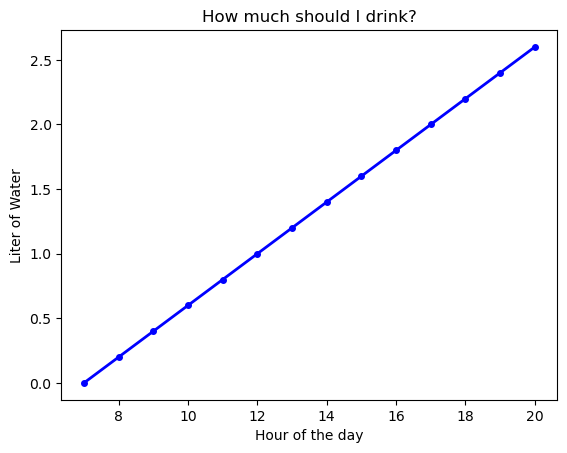

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(DAY_TIME.flatten(), DRINK_WATER.flatten(), marker='o', color='blue', markersize=4, linewidth=2)

ax.set_title('How much should I drink?')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Liter of Water')


plt.show()

# Generate Data

In [128]:
X = np.array([7., 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]).T
Y = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6])

# Setup the parameter

In [129]:
# configuration
learning_rate = 0.01

## preset/initials
# initial weight
w1 = 1.0#random.random()
print("Initial Weight: [%s]" % (w1))

# initial bias
bias = 1.0#random.random()
print("Initial Bias: [%s]" % (bias))


Initial Weight: [1.0]
Initial Bias: [1.0]


# Compute Functions

In [130]:

# Inner neuron
def compute_neuron(X, W, bias) :
    return np.dot(X, W) + bias
    #return ReLU( y_ )

# Loss (Error)
def compute_loss(Y_true, Y_pred) :
    return np.mean( (Y_true - Y_pred) ** 2 )

# Gradients for Learning
def compute_gradients(X, Y_true, Y_pred, W, bias) :
    dW = -2 * np.dot(X.T, (Y_true - Y_pred) / len(X))
    dB = -2 * np.sum(Y_true - Y_pred) / len(X)
    return dW, dB

# Update the weights
def update_weights(W, bias, dW, dB, learning_rate) :
    W    -= learning_rate * dW
    bias  -= learning_rate * dB
    return W, bias

In [131]:
X /= 20
Y /= 20

# Initialize weights and bias
weights = w1
bias = bias

# Training parameters
learning_rate = 0.01
epochs = 200

weight_history = list()
bias_history = list()
loss_history   = list()

# Training loop
for epoch in range(epochs):
    # Compute neuron output
    Y_pred = compute_neuron(X, weights, bias)

    # Compute loss
    loss = compute_loss(Y, Y_pred)

    # Compute gradients
    dW, dB = compute_gradients(X, Y, Y_pred, weights, bias)

    # Update weights and bias
    weights, bias = update_weights(weights, bias, dW, dB, learning_rate)
    # Optionally, print the loss at certain intervals
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        print(weights)
        weight_history.append(weights)
        bias_history.append(bias)
        loss_history.append(loss)

# Final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)


Epoch 0, Loss: 2.6181000000000005
0.977615
Epoch 10, Loss: 1.4422908820005873
0.7868890817907863
Epoch 20, Loss: 0.794558527686894
0.6452758790430015
Epoch 30, Loss: 0.43773415191652393
0.5401151296842853
Epoch 40, Loss: 0.24116574374370706
0.46201020523561814
Epoch 50, Loss: 0.13287946412536442
0.4039867925672637
Epoch 60, Loss: 0.07322622177602427
0.36086845551422253
Epoch 70, Loss: 0.040364046588696
0.32881316781265546
Epoch 80, Loss: 0.022260590701497253
0.30496932124361154
Epoch 90, Loss: 0.01228745041792709
0.2872204099774253
Epoch 100, Loss: 0.006793157525288307
0.27399553165735746
Epoch 110, Loss: 0.003766183936909124
0.2641287386045967
Epoch 120, Loss: 0.002098415036802454
0.25675464627915917
Epoch 130, Loss: 0.0011794104144742068
0.2512309523925643
Epoch 140, Loss: 0.00067288941351019
0.24708092948957583
Epoch 150, Loss: 0.00039360104711754314
0.24395074212318485
Epoch 160, Loss: 0.00023949385290012102
0.24157776705386047
Epoch 170, Loss: 0.0001543494878760385
0.2397670800501

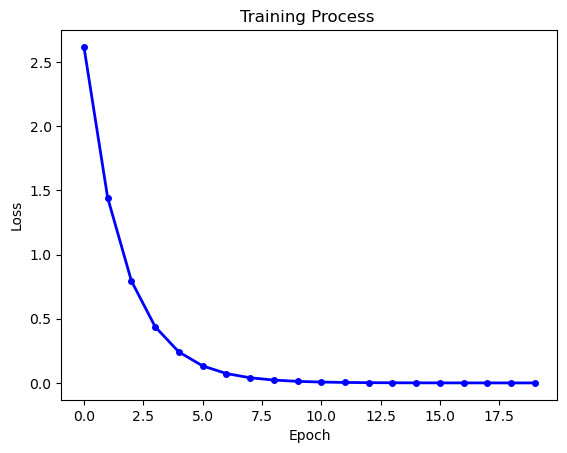

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(loss_history)), loss_history, marker='o', color='blue', markersize=4, linewidth=2)
#ax.plot(range(len(loss_history)), np.log(loss_history), marker='o', color='blue', markersize=4, linewidth=2)

ax.set_title('Training Process ')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


plt.show()

# Optimisation

In [135]:
x = np.linspace(0, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)

z = list()
for i in range(100) :
    z_i = list()
    for j in range(100):
        z_i.append(
            compute_loss(Y, compute_neuron(
                X, 
                np.array(x[i, j]), 
                y[i, j])
            )
        )
    z.append(z_i)

z = np.array(z)


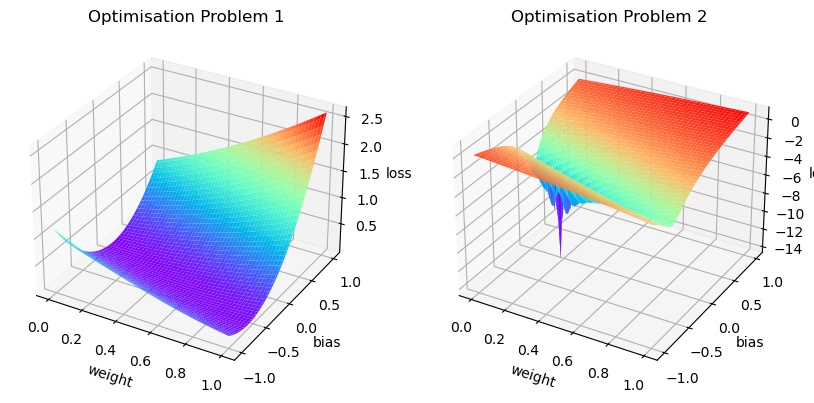

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming x, y, z are defined properly

fig = plt.figure(figsize=(10, 10))  # Adjust the figure size as needed

# First subplot
ax1 = fig.add_subplot(121, projection='3d')  # 2 rows, 1 column, 1st subplot
ax1.plot_surface(x, y, z, cmap='rainbow')
ax1.set_title('Optimisation Problem 1')
ax1.set_xlabel('weight')
ax1.set_ylabel('bias')
ax1.set_zlabel('loss')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')  # 2 rows, 1 column, 2nd subplot
ax2.plot_surface(x, y, np.log(z), cmap='rainbow')
ax2.set_title('Optimisation Problem 2')
ax2.set_xlabel('weight')
ax2.set_ylabel('bias')
ax2.set_zlabel('loss')

# Display the plot
plt.show()


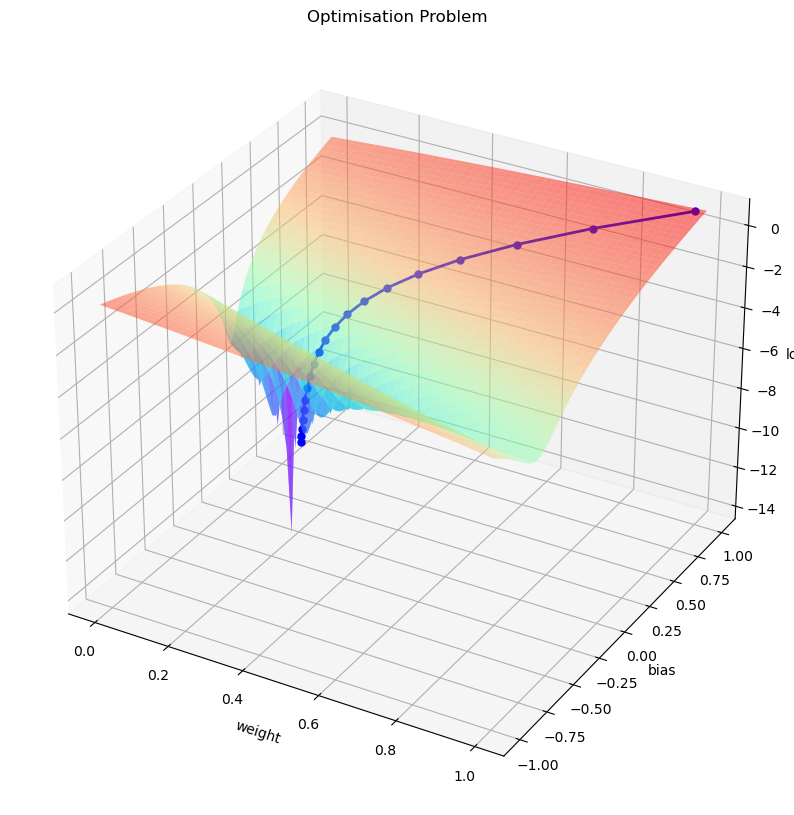

In [137]:

fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, np.log(z), cmap='rainbow', alpha=0.5)
ax.plot(weight_history, bias_history, np.log(loss_history), marker='o', color='b', markersize=5, linewidth=2)


ax.set_title('Optimisation Problem')
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('loss')


plt.show()